# 01 Hello World

## 1 机器学习能解决的问题

**监督学习（supervised learning）**：从已知的示例中泛化得出。示例：

- 识别信封上手写的邮政编码
- 基于医学影像判断肿瘤是否为良性
- 检测信用卡交易中的诈骗行为

**无监督学习（unsupervised learning）**：输入数据已知，不提供输出数据。示例：

- 确定一系列博客文章的主题
- 将客户分成具有相似偏好的群体
- 检测网站的异常访问模式

无论是监督学习还是无监督学习，将数据表征为计算机能理解的形式都是十分重要的。

在机器学习中，数据中的每一个实体（表格中的每一行）称为一个**样本（sample）**或数据点，每一列（描述这些实体的属性）称为**特征（feature）**。

如果没有数据信息，所有机器学习算法都无法做出预测。构建良好的数据表征称为**特征提取（feature extraction）**或**特征工程（feature engineering）**。

每种算法的输入数据类型和最适合的解决的问题是不一样的，开始构建机器学习模型之前，先明确自己要解决的问题和收集的数据。构建模型的目标永远是解决问题。

## 2 鸢尾花分类

数据是已知品种的鸢尾花的测量数据：

- 鸢尾花的测量数据：花瓣长度和宽度、花萼长度和宽度（厘米）。
- 鸢尾花种类：setosa、versicolor、virginica 三者之一。

这是一个**分类（classification）**问题，可能的输出（鸢尾花的品种）叫**类别（class）**，因此是一个三分类问题。对于一个数据点来说，它的种类叫做**标签（label）**。

### 2.1 初识数据

导入数据集：

In [34]:
from sklearn.datasets import load_iris

iris_dataset = load_iris() # 返回一个 Bunch 对象，与字典类似
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
print("要预测的品种：{}".format(iris_dataset['target_names']))
print("特征说明：{}".format(iris_dataset['feature_names']))

要预测的品种：['setosa' 'versicolor' 'virginica']
特征说明：['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [36]:
print("测量数据形状：{}".format(iris_dataset['data'].shape))
print("测量数据前 5 行：\n{}".format(iris_dataset['data'][:5]))

测量数据形状：(150, 4)
测量数据前 5 行：
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [37]:
print("分类数据形状：{}".format(iris_dataset['target'].shape))
print("分类数据前 5 行：{}".format(iris_dataset['target'][:5]))

分类数据形状：(150,)
分类数据前 5 行：[0 0 0 0 0]


品种被转换为 0 到 2 的整数，0 - setosa，1 - versicolor，2 - Virginia。

### 2.2 训练数据与测试数据

在将训练好的数据用于新的测量数据之前，需要知道模型是否有效，也就是评估模型的**泛化（generalize）**能力如何。

我们需要新的数据来评估模型的性能，通常的做法是将收集好的带标签的数据分为两部分，一部分用于构建机器学习模型，即**训练数据（training data）**或**训练集（training set）**。其余数据用来评估模型性能，称为**测试数据（test data）**、**测试集（test set）**或**留出集（hold-out set）**。

`scikit-learn` 中的 `train_test_split` 函数可以打乱数据集并进行拆分，并将 75% 的数据及其标签用于训练集，25% 用于测试集。该比例可以是随意的，使用 25% 的数据作为测试集是一个经验法则。

`scikit-learn` 中的数据（二维数组）通常用大写的 X 表示，标签（一维数组）用小写的 y 表示。

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'],
    iris_dataset['target'],
    random_state=0, # 随机数种子
)

print("训练集数据形状：{}".format(X_train.shape))
print("训练集标签形状：{}".format(y_train.shape))
print("测试集数据形状：{}".format(X_test.shape))
print("测试集标签形状：{}".format(y_test.shape))

训练集数据形状：(112, 4)
训练集标签形状：(112,)
测试集数据形状：(38, 4)
测试集标签形状：(38,)


### 2.3 观察数据

检查数据的目的是发现和处理异常值。最佳做法之一是将数据可视化，一种可视化方法是绘制**散点图（scatter plot）**。散点图只有两个维度，一次只能绘制两个特征。对于特征较多的数据集，可以绘制**散点图矩阵（pair plot）**，从而可以查看两两特征之间的关系。

使用 `pandas` 绘制散点图矩阵，矩阵对角线为每个特征的直方图。

In [39]:
import pandas as pd

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = "Noto Serif SC"
plt.rcParams["axes.unicode_minus"] = False

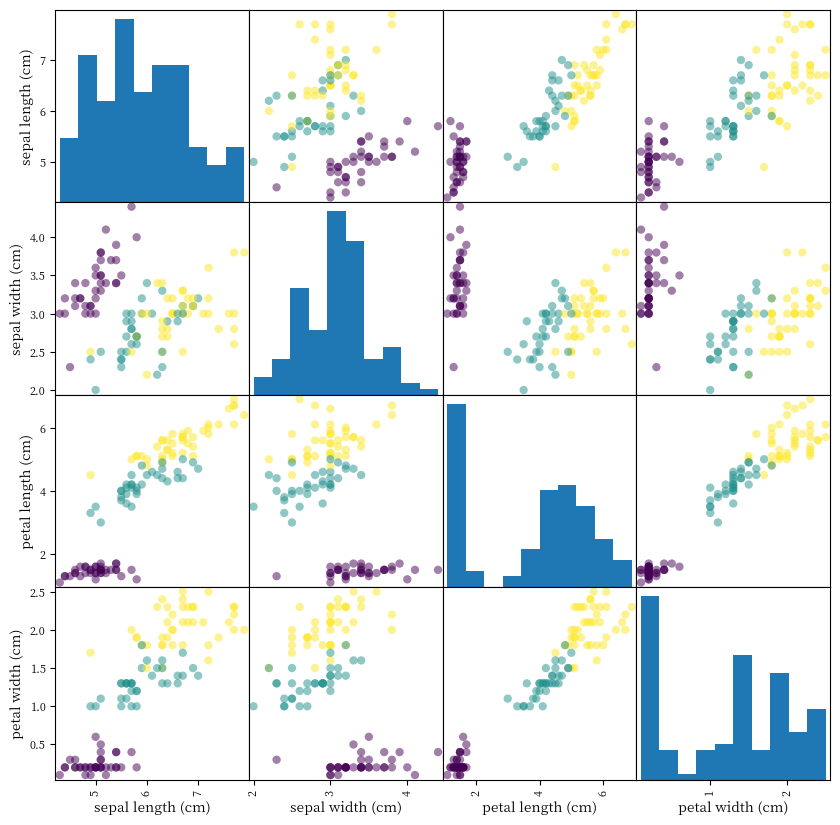

In [41]:
grr = pd.plotting.scatter_matrix(
    iris_dataframe,
    c = y_train,
    figsize=(10, 10),
    marker='o',
)

从散点图矩阵中可以看出，利用花瓣和花萼的测量数据基本可以将三个类别分开。这说明机器学习模型可能可以学会区分它们。

### 2.4 构建模型：k 近邻算法

`scikit-learn` 中有许多可用的分类算法，这里使用 k 近邻算法。k 近邻算法中 k 的含义是：

> 考虑训练集中于新数据点最近的任意 k 个近邻，用这些近邻中数量最多的类别做出预测。

`scikit-learn` 中所有的机器学习模型都是在各自的类中实现的，这些类称为 `Estimator` 类。k 近邻算法是在 `neighbors` 模块中的 `KNeighborsClassifier` 类中实现的。我们将这个类实例化，就可以使用这个模型了。设置模型参数时，最重要的参数是近邻的数目，这里使用 1。

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

`knn` 对象对算法进行了封装，包括了训练数据构建模型的算法和对新数据点进行预测的算法，以及从训练数据中提取数据的算法。

基于训练集构建模型时，调用 `knn` 对象的 `fit` 方法，传入训练数据和训练标签：

In [43]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 2.5 做出预测

对花萼长 5cm 宽 2.9cm、花瓣长 1cm 宽 0.2cm 的鸢尾花，预测其品种：

In [44]:
import numpy as np

# scikit-learn 的输入必须是二维数组
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new

array([[5. , 2.9, 1. , 0.2]])

In [45]:
prediction = knn.predict(X_new)
prediction

array([0])

In [46]:
print("预测种类：{}".format(iris_dataset['target_names'][prediction]))

预测种类：['setosa']


### 2.6 评估模型

对测试数据集中的每个数据点进行预测，将预测结果于标签进行对比，通过计算**精度（accuracy）**来衡量模型的优劣。

> 精度即正确的预测值所占比例。

In [47]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [48]:
print("精度：{}".format(np.mean(y_pred==y_test)))

精度：0.9736842105263158


也可以使用 `knn` 对象的 `score` 方法来计算测试集的精度：

In [49]:
print("精度：{}".format(knn.score(X_test, y_test)))

精度：0.9736842105263158
